# Merging 30 Datasets

## Imports

In [18]:
from tdc.multi_pred import DTI
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

## Drug-Target Interaction Prediction

https://tdcommons.ai/multi_pred_tasks/dti/

### Data Extraction

In [19]:
BindingDB_Kd = DTI(name = 'BindingDB_Kd')
BindingDB_Kd.convert_to_log(form = 'standard')
BindingDB_Kd = BindingDB_Kd.harmonize_affinities(mode = 'max_affinity')

Found local copy...
Loading...
Done!
To log space...


In [20]:
DAVIS = DTI(name = 'DAVIS')
DAVIS.convert_to_log(form = 'standard')
DAVIS = DAVIS.get_data()

Found local copy...
Loading...
Done!
To log space...


In [21]:
KIBA = DTI(name = 'KIBA')
KIBA.convert_to_log(form = 'standard')
KIBA = KIBA.get_data()

Found local copy...
Loading...
Done!
To log space...


<AxesSubplot:xlabel='Y', ylabel='Count'>

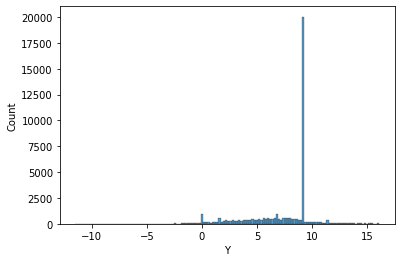

In [22]:
sns.histplot(BindingDB_Kd['Y'])

<AxesSubplot:xlabel='Y', ylabel='Count'>

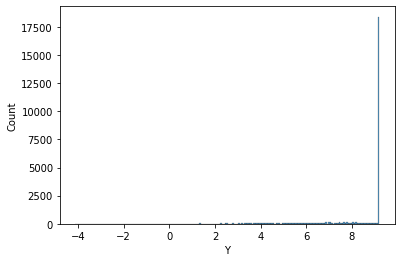

In [23]:
sns.histplot(DAVIS['Y'])

<AxesSubplot:xlabel='Y', ylabel='Count'>

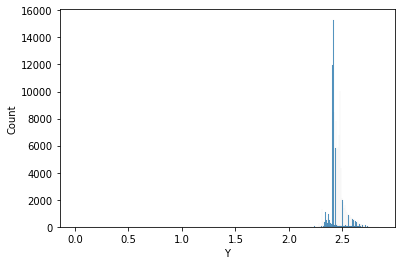

In [24]:
sns.histplot(KIBA['Y'])

In [25]:
BindingDB_Kd.describe()

,Drug_ID,Y
count,4.223600e+04,42236.000000
mean,2.570271e+07,7.356460
std,3.456051e+07,3.162121
min,5.100000e+01,-11.512915
25%,5.329102e+06,5.703782
50%,1.121356e+07,9.210340
75%,2.517933e+07,9.210340
max,1.388059e+08,16.118096


###  Data Cleaning

In [26]:
interactive_ds = [BindingDB_Kd, DAVIS, KIBA]

In [27]:
clean_ds = []

for df in interactive_ds:
    min_value = df['Y'].min()
    max_value = df['Y'].max()
    bins = np.linspace(min_value,max_value,5)
    labels = [3,2,1,0] # labels, lower the values, the higher the label.
    df['Y_cat'] = pd.cut(df['Y'], bins=bins,labels=labels,include_lowest=True)
    df = df[['Drug','Target','Y_cat']]
    df = df.drop_duplicates(subset=['Drug', 'Target'], keep='first')
    df_clean = pd.pivot(df, index='Drug',columns='Target', values ='Y_cat')
    df_clean = df_clean.fillna(0)
    clean_ds.append(df_clean)
    
BindingDB_Kd_clean, DAVIS_clean, KIBA_clean = clean_ds[0],clean_ds[1],clean_ds[2]

In [28]:
BindingDB_Kd_clean

Target,AMTDLLVSILVMPISIPYTITQTWSFGQLLCDIWLSSDITCCTASILHLCVIALDRYWAITDALEYSKRRTAGHAAAMIAIVWAISICISIPPLFWRQARAHEEISDCLVNTSQISYTIYSTCGAFYIPSLLLIILYGRIYRAARNRILNPPSLYGKRFTTAHLITGSAGSSLCSLNPSLHEGHSHSAGSPLFFNHVKIKLADSVLERKRISAARERKATKTLGIILGAFIICWLPFFVASLVLPICRDSCWIHPALFDFFTWLGYLNSLINPIIYTVFNEEFRQAFQKVV,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNVNKVRVAIKKISPFEHQTYCQRTLREIKILLRFRHENIIGINDIIRAPTIEQMKDVYIVQDLMETDLYKLLKTQHLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLLNTTCDLKICDFGLARVADPDHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINLKARNYLLSLPHKNKVPWNRLFPNADSKALDLLDKMLTFNPHKRIEVEQALAHPYLEQYYDPSDEPIAEAPFKFDMELDDLPKEKLKELIFEETARFQPGYRS,MAAAAAAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNLNKVRVAIKKISPFEHQTYCQRTLREIKILLRFRHENIIGINDIIRAPTIEQMKDVYIVQDLMETDLYKLLKTQHLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLLNTTCDLKICDFGLARVADPDHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINLKARNYLLSLPHKNKVPWNRLFPNADSKALDLLDKMLTFNPHKRIEVEQALAHPYLEQYYDPSDEPIAEAPFKFDMELDDLPKEKLKELIFEETARFQPGYRS,MAAAAAAVGPGAGGAGSAVPGGAGPCATVSVFPGARLLTIGDANGEIQRHAEQQALRLEVRAGPDSAGIALYSHEDVCVFKCSVSRETECSRVGKQSFIITLGCNSVLIQFATPNDFCSFYNILKTCRGHTLERSVFSERTEESSAVQYFQFYGYLSQQQNMMQDYVRTGTYQRAILQNHTDFKDKIVLDVGCGSGILSFFAAQAGARKIYAVEASTMAQHAEVLVKSNNLTDRIVVIPGKVEEVSLPEQVDIIISEPMGYMLFNERMLESYLHAKKYLKPSGNMFPTIGDVHLAPFTDEQLYMEQFTKANFWYQPSFHGVDLSALRGAAVDEYFRQPVVDTFDIRILMAKSVKYTVNFLEAKEGDLHRIEIPFKFHMLHSGLVHGLAFWFDVAFIGSIMTVWLSTAPTEPLTHWYQVRCLFQSPLFAKAGDTLSGTCLLIANKRQSYDISIVAQVDQTGSKSSNLLDLKNPFFRYTGTTPSPPPGSHYTSPSENMWNTGSTYNLSSGMAVAGMPTAYDLSSVIASGSSVGHNNLIPLANTGIVNHTHSRMGSIMSTGIVQGSSGAQGSGGGSTSAHYAVNSQFTMGGPAISMASPMSIPTNTMHYGS,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQYIGEGAYGMVSSAYDHVRKTRVAIKKISPFEHQTYCQRTLREIQILLRFRHENVIGIRDILRASTLEAMRDVYIVQDLMETDLYKLLKSQQLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLINTTCDLKICDFGLARIADPEHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINMKARNYLQSLPSKTKVAWAKLFPKSDSKALDLLDRMLTFNPNKRITVEEALAHPYLEQYYDPTDEPVAEEPFTFAMELDDLPKERLKELIFQETARFQPGVLEAP,MAAAAGAAAAAAAEGEAPAEMGALLLEKETRGATERVHGSLGDTPRSEETLPKATPDSLEPAGPSSPASVTVTVGDEGADTPVGATPLIGDESENLEGDGDLRGGRILLGHATKSFPSSPSKGGSCPSRAKMSMTGAGKSPPSVQSLAMRLLSMPGAQGAAAAGSEPPPATTSPEGQPKVHRARKTMSKPGNGQPPVPEKRPPEIQHFRMSDDVHSLGKVTSDLAKRRKLNSGGGLSEELGSARRSGEVTLTKGDPGSLEEWETVVGDDFSLYYDSYSVDERVDSDSKSEVEALTEQLSEEEEEEEEEEEEEEEEEEEEEEEEDEESGNQSDRSGSSGRRKAKKKWRKDSPWVKPSRKRRKREPPRAKEPRGVNGVGSSGPSEYMEVPLGSLELPSEGTLSPNHAGVSNDTSSLETERGFEELPLCSCRMEAPKIDRISERAGHKCMATESVDGELSGCNAAILKRETMRPSSRVALMVLCETHRARMVKHHCCPGCGYFCTAGTFLECHPDFRVAHRFHKACVSQLNGMVFCPHCGEDASEAQEVTIPRGDGVTPPAGTAAPAPPPLSQDVPGRADTSQPSARMRGHGEPRRPPCDPLADTIDSSGPSLTLPNGGCLSAVGLPLGPGREALEKALVIQESERRKKLRFHPRQLYLSVKQGELQKVILMLLDNLDPNFQSDQQSKRTPLHAAAQKGSVEICHVLLQAGANINAVDKQQRTPLMEAVVNNHLEVARYMVQRGGCVYSKEEDGSTCLHHAAKIGNLEMVSLLLSTGQVDVNAQDSGGWTPIIWAAEHKHIEVIRMLLTRGADVTLTDNEENICLHWASFTGSAAIAEVLLNARCDLHAVNYHGDTPLHIAARESYHDCVLLFLSRGANPELRNKEGDTAWDLTPERSDVWFALQLNRKLRLGVGNRAIRTEKIICRDVARGYENVPIPCVNGVDGEPCPEDYKYISENCETSTMNIDRNITHLQHCTCVDDCSSSNCLCGQLSIRCWYDKDGRLLQEFNKIEPPLIFECNQACSCWRNCKNRVVQSGIKVRLQLYRTAKMGWGVRALQTIPQGTFICEYVGELISDAEADVREDDSYLFDLDNKDGEVYCIDARYYGNISRFINHLCDPNIIPVRVFMLHQDLRFPRIAFFSSRDIRTGEELGFDYGDRFWDIKSKYFTCQCGSEKCKHSAEAIALEQSRLARLDPHPELLPELGSLPPVNT,MAAADAEAVPARGEPQQDCCVKTELLGEETPMAADEGSAEKQAGEAHMAADGETNGSCENSDASSHANAAKHTQDSARVNPQDGTNTLTRIAENGVSERDSEAAKQNHVTADDFVQTSVIGSNGYILNKPALQAQPLRTTSTLASSLPGHAAKTLPGGAGKGRTPSAFPQTPAAPPATLGEGSADTEDRKLPAPGADVKVHRARKTMPKSVVGLHAASKDPREVREARDHKEPKEEINKNISDFGRQQLLPPFPSLHQSLPQNQCYMATTKSQTACLPFVLAAAVSRKKKRRMGTYSLVPKKKTKVLKQRTVIEMFKSITHSTVGSKGEKDLGASSLHVNGESLEMDSDEDDSEELEEDDGHGAEQAAAFPTEDSRTSKESMSEADRAQKMDGESEEEQESVDTGEEEEGGDESDLSSESSIKKKFLKRKGKTDSPWIKPARKRRRRSRKKPSGALGSESYKSSAGSAEQTAPGDSTGYMEVSLDSLDLRVKGILSSQAEGLANGPDVLETDGLQEVPLCSCRMETPKSREITTLANNQCMATESVDHELGRCTNSVVKYELMRPSNKAPLLVLCEDHRGRMVKHQCCPGCGYFCTAGNFMECQPESSISHRFHKDCASRVNNASYCPHCGEESSKAKEVTIAKADTTSTVTPVPGQEKGSALEGRADTTTGSAAGPPLSEDDKLQGAASHVPEGFDPTGPAGLGRPTPGLSQGPGKETLESALIALDSEKPKKLRFHPKQLYFSARQGELQKVLLMLVDGIDPNFKMEHQNKRSPLHAAA

In [29]:
DTI_merged = pd.merge(BindingDB_Kd_clean,DAVIS_clean, how ='outer', on = 'Drug').merge(
    KIBA_clean, how='outer',on ='Drug').fillna(0)

In [30]:
DTI_merged

Target,AMTDLLVSILVMPISIPYTITQTWSFGQLLCDIWLSSDITCCTASILHLCVIALDRYWAITDALEYSKRRTAGHAAAMIAIVWAISICISIPPLFWRQARAHEEISDCLVNTSQISYTIYSTCGAFYIPSLLLIILYGRIYRAARNRILNPPSLYGKRFTTAHLITGSAGSSLCSLNPSLHEGHSHSAGSPLFFNHVKIKLADSVLERKRISAARERKATKTLGIILGAFIICWLPFFVASLVLPICRDSCWIHPALFDFFTWLGYLNSLINPIIYTVFNEEFRQAFQKVV,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNVNKVRVAIKKISPFEHQTYCQRTLREIKILLRFRHENIIGINDIIRAPTIEQMKDVYIVQDLMETDLYKLLKTQHLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLLNTTCDLKICDFGLARVADPDHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINLKARNYLLSLPHKNKVPWNRLFPNADSKALDLLDKMLTFNPHKRIEVEQALAHPYLEQYYDPSDEPIAEAPFKFDMELDDLPKEKLKELIFEETARFQPGYRS_x,MAAAAAAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNLNKVRVAIKKISPFEHQTYCQRTLREIKILLRFRHENIIGINDIIRAPTIEQMKDVYIVQDLMETDLYKLLKTQHLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLLNTTCDLKICDFGLARVADPDHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINLKARNYLLSLPHKNKVPWNRLFPNADSKALDLLDKMLTFNPHKRIEVEQALAHPYLEQYYDPSDEPIAEAPFKFDMELDDLPKEKLKELIFEETARFQPGYRS,MAAAAAAVGPGAGGAGSAVPGGAGPCATVSVFPGARLLTIGDANGEIQRHAEQQALRLEVRAGPDSAGIALYSHEDVCVFKCSVSRETECSRVGKQSFIITLGCNSVLIQFATPNDFCSFYNILKTCRGHTLERSVFSERTEESSAVQYFQFYGYLSQQQNMMQDYVRTGTYQRAILQNHTDFKDKIVLDVGCGSGILSFFAAQAGARKIYAVEASTMAQHAEVLVKSNNLTDRIVVIPGKVEEVSLPEQVDIIISEPMGYMLFNERMLESYLHAKKYLKPSGNMFPTIGDVHLAPFTDEQLYMEQFTKANFWYQPSFHGVDLSALRGAAVDEYFRQPVVDTFDIRILMAKSVKYTVNFLEAKEGDLHRIEIPFKFHMLHSGLVHGLAFWFDVAFIGSIMTVWLSTAPTEPLTHWYQVRCLFQSPLFAKAGDTLSGTCLLIANKRQSYDISIVAQVDQTGSKSSNLLDLKNPFFRYTGTTPSPPPGSHYTSPSENMWNTGSTYNLSSGMAVAGMPTAYDLSSVIASGSSVGHNNLIPLANTGIVNHTHSRMGSIMSTGIVQGSSGAQGSGGGSTSAHYAVNSQFTMGGPAISMASPMSIPTNTMHYGS,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQYIGEGAYGMVSSAYDHVRKTRVAIKKISPFEHQTYCQRTLREIQILLRFRHENVIGIRDILRASTLEAMRDVYIVQDLMETDLYKLLKSQQLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLINTTCDLKICDFGLARIADPEHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINMKARNYLQSLPSKTKVAWAKLFPKSDSKALDLLDRMLTFNPNKRITVEEALAHPYLEQYYDPTDEPVAEEPFTFAMELDDLPKERLKELIFQETARFQPGVLEAP_x,MAAAAGAAAAAAAEGEAPAEMGALLLEKETRGATERVHGSLGDTPRSEETLPKATPDSLEPAGPSSPASVTVTVGDEGADTPVGATPLIGDESENLEGDGDLRGGRILLGHATKSFPSSPSKGGSCPSRAKMSMTGAGKSPPSVQSLAMRLLSMPGAQGAAAAGSEPPPATTSPEGQPKVHRARKTMSKPGNGQPPVPEKRPPEIQHFRMSDDVHSLGKVTSDLAKRRKLNSGGGLSEELGSARRSGEVTLTKGDPGSLEEWETVVGDDFSLYYDSYSVDERVDSDSKSEVEALTEQLSEEEEEEEEEEEEEEEEEEEEEEEEDEESGNQSDRSGSSGRRKAKKKWRKDSPWVKPSRKRRKREPPRAKEPRGVNGVGSSGPSEYMEVPLGSLELPSEGTLSPNHAGVSNDTSSLETERGFEELPLCSCRMEAPKIDRISERAGHKCMATESVDGELSGCNAAILKRETMRPSSRVALMVLCETHRARMVKHHCCPGCGYFCTAGTFLECHPDFRVAHRFHKACVSQLNGMVFCPHCGEDASEAQEVTIPRGDGVTPPAGTAAPAPPPLSQDVPGRADTSQPSARMRGHGEPRRPPCDPLADTIDSSGPSLTLPNGGCLSAVGLPLGPGREALEKALVIQESERRKKLRFHPRQLYLSVKQGELQKVILMLLDNLDPNFQSDQQSKRTPLHAAAQKGSVEICHVLLQAGANINAVDKQQRTPLMEAVVNNHLEVARYMVQRGGCVYSKEEDGSTCLHHAAKIGNLEMVSLLLSTGQVDVNAQDSGGWTPIIWAAEHKHIEVIRMLLTRGADVTLTDNEENICLHWASFTGSAAIAEVLLNARCDLHAVNYHGDTPLHIAARESYHDCVLLFLSRGANPELRNKEGDTAWDLTPERSDVWFALQLNRKLRLGVGNRAIRTEKIICRDVARGYENVPIPCVNGVDGEPCPEDYKYISENCETSTMNIDRNITHLQHCTCVDDCSSSNCLCGQLSIRCWYDKDGRLLQEFNKIEPPLIFECNQACSCWRNCKNRVVQSGIKVRLQLYRTAKMGWGVRALQTIPQGTFICEYVGELISDAEADVREDDSYLFDLDNKDGEVYCIDARYYGNISRFINHLCDPNIIPVRVFMLHQDLRFPRIAFFSSRDIRTGEELGFDYGDRFWDIKSKYFTCQCGSEKCKHSAEAIALEQSRLARLDPHPELLPELGSLPPVNT,MAAADAEAVPARGEPQQDCCVKTELLGEETPMAADEGSAEKQAGEAHMAADGETNGSCENSDASSHANAAKHTQDSARVNPQDGTNTLTRIAENGVSERDSEAAKQNHVTADDFVQTSVIGSNGYILNKPALQAQPLRTTSTLASSLPGHAAKTLPGGAGKGRTPSAFPQTPAAPPATLGEGSADTEDRKLPAPGADVKVHRARKTMPKSVVGLHAASKDPREVREARDHKEPKEEINKNISDFGRQQLLPPFPSLHQSLPQNQCYMATTKSQTACLPFVLAAAVSRKKKRRMGTYSLVPKKKTKVLKQRTVIEMFKSITHSTVGSKGEKDLGASSLHVNGESLEMDSDEDDSEELEEDDGHGAEQAAAFPTEDSRTSKESMSEADRAQKMDGESEEEQESVDTGEEEEGGDESDLSSESSIKKKFLKRKGKTDSPWIKPARKRRRRSRKKPSGALGSESYKSSAGSAEQTAPGDSTGYMEVSLDSLDLRVKGILSSQAEGLANGPDVLETDGLQEVPLCSCRMETPKSREITTLANNQCMATESVDHELGRCTNSVVKYELMRPSNKAPLLVLCEDHRGRMVKHQCCPGCGYFCTAGNFMECQPESSISHRFHKDCASRVNNASYCPHCGEESSKAKEVTIAKADTTSTVTPVPGQEKGSALEGRADTTTGSAAGPPLSEDDKLQGAASHVPEGFDPTGPAGLGRPTPGLSQGPGKETLESALIALDSEKPKKLRFHPKQLYFSARQGELQKVLLMLVDGIDPNFKMEHQNKRSPL

## ADME Property Prediction

https://tdcommons.ai/single_pred_tasks/adme/

### Data Extraction

In [31]:
from tdc.single_pred import ADME

In [32]:
Caco2_Wang = ADME(name = 'Caco2_Wang').get_data()

Found local copy...
Loading...
Done!


In [33]:
HIA_Hou = ADME(name = 'HIA_Hou').get_data()

Found local copy...
Loading...
Done!


In [34]:
Pgp_Broccatelli = ADME(name = 'Pgp_Broccatelli').get_data()

Found local copy...
Loading...
Done!


In [35]:
Bioavailability_Ma = ADME(name = 'Bioavailability_Ma').get_data()

Found local copy...
Loading...
Done!


In [36]:
Lipophilicity_AstraZeneca = ADME(name = 'Lipophilicity_AstraZeneca').get_data()

Found local copy...
Loading...
Done!


In [37]:
Solubility_AqSolDB = ADME(name = 'Solubility_AqSolDB').get_data()

Found local copy...
Loading...
Done!


In [38]:
HydrationFreeEnergy_FreeSolv = ADME(name = 'HydrationFreeEnergy_FreeSolv').get_data()

Found local copy...
Loading...
Done!


In [39]:
BBB_Martins = ADME(name = 'BBB_Martins').get_data()

Found local copy...
Loading...
Done!


In [40]:
PPBR_AZ = ADME(name = 'PPBR_AZ').get_data()

Found local copy...
Loading...
Done!


In [41]:
VDss_Lombardo = ADME(name = 'VDss_Lombardo').get_data()

Found local copy...
Loading...
Done!


In [42]:
CYP2C19_Veith = ADME(name = 'CYP2C19_Veith').get_data()

Found local copy...
Loading...
Done!


In [43]:
CYP2D6_Veith = ADME(name = 'CYP2D6_Veith').get_data()

Found local copy...
Loading...
Done!


In [44]:
CYP3A4_Veith = ADME(name = 'CYP3A4_Veith').get_data()

Found local copy...
Loading...
Done!


In [45]:
CYP1A2_Veith= ADME(name = 'CYP1A2_Veith').get_data()

Found local copy...
Loading...
Done!


In [46]:
CYP2C9_Veith = ADME(name = 'CYP2C9_Veith').get_data()

Found local copy...
Loading...
Done!


In [47]:
CYP2C9_Substrate_CarbonMangels = ADME(name = 'CYP2C9_Substrate_CarbonMangels').get_data()

Found local copy...
Loading...
Done!


In [48]:
CYP2D6_Substrate_CarbonMangels = ADME(name = 'CYP2D6_Substrate_CarbonMangels').get_data()

Found local copy...
Loading...
Done!


In [49]:
CYP3A4_Substrate_CarbonMangels = ADME(name = 'CYP3A4_Substrate_CarbonMangels').get_data()

Found local copy...
Loading...
Done!


In [50]:
Half_Life_Obach = ADME(name = 'Half_Life_Obach').get_data()

Found local copy...
Loading...
Done!


In [51]:
Clearance_Hepatocyte_AZ = ADME(name = 'Clearance_Hepatocyte_AZ').get_data()

Found local copy...
Loading...
Done!


### Data Cleaning

In [52]:


ADME_dfs = {'Caco2_Wang':Caco2_Wang,'HIA_Hou':HIA_Hou, 'Pgp_Broccatelli':Pgp_Broccatelli, 'Bioavailability_Ma': Bioavailability_Ma,
           'Lipophilicity_AstraZeneca': Lipophilicity_AstraZeneca, 'Solubility_AqSolDB': Solubility_AqSolDB,
           'HydrationFreeEnergy_FreeSolv':HydrationFreeEnergy_FreeSolv,'BBB_Martins': BBB_Martins,
           'PPBR_AZ': PPBR_AZ, 'VDss_Lombardo': VDss_Lombardo, 'CYP2C19_Veith': CYP2C19_Veith, 
           'CYP2D6_Veith':CYP2D6_Veith, 'CYP3A4_Veith':CYP3A4_Veith, 'CYP1A2_Veith':CYP1A2_Veith,
           'CYP2C9_Veith':CYP2C9_Veith, 'CYP2C9_Substrate_CarbonMangels': CYP2C9_Substrate_CarbonMangels,
           'CYP2D6_Substrate_CarbonMangels':CYP2D6_Substrate_CarbonMangels, 
            'CYP3A4_Substrate_CarbonMangels': CYP3A4_Substrate_CarbonMangels, 
           'Half_Life_Obach':Half_Life_Obach, 'Clearance_Hepatocyte_AZ': Clearance_Hepatocyte_AZ}


# rename Y as the name
for df in ADME_dfs.items():
    print(df[0])
    df[1].rename(columns= {"Y": df[0]}, inplace = True)
    df[1].drop(columns ='Drug_ID', inplace = True, axis = 0)

ADME_df_clean = []
for i in ADME_dfs:
    ADME_df_clean.append(ADME_dfs[i])

from functools import reduce
AMDE_merged = reduce(lambda left, right : pd.merge(left,right, on =['Drug'], 
                                                 how ='outer'),ADME_df_clean).fillna(0)

AMDE_merged

Caco2_Wang
HIA_Hou
Pgp_Broccatelli
Bioavailability_Ma
Lipophilicity_AstraZeneca
Solubility_AqSolDB
HydrationFreeEnergy_FreeSolv
BBB_Martins
PPBR_AZ
VDss_Lombardo
CYP2C19_Veith
CYP2D6_Veith
CYP3A4_Veith
CYP1A2_Veith
CYP2C9_Veith
CYP2C9_Substrate_CarbonMangels
CYP2D6_Substrate_CarbonMangels
CYP3A4_Substrate_CarbonMangels
Half_Life_Obach
Clearance_Hepatocyte_AZ


,Drug,Caco2_Wang,HIA_Hou,Pgp_Broccatelli,Bioavailability_Ma,Lipophilicity_AstraZeneca,Solubility_AqSolDB,HydrationFreeEnergy_FreeSolv,BBB_Martins,PPBR_AZ,...,CYP2C19_Veith,CYP2D6_Veith,CYP3A4_Veith,CYP1A2_Veith,CYP2C9_Veith,CYP2C9_Substrate_CarbonMangels,CYP2D6_Substrate_CarbonMangels,CYP3A4_Substrate_CarbonMangels,Half_Life_Obach,Clearance_Hepatocyte_AZ
0,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,-6.220000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C,-3.860000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,-4.090000,0.0,0.0,1.0,0.0,-1.522,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.00
3,CN1CC(=O)NC1=N,-5.935409,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,-4.840000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37387,CC1CCC2C(C)C(=O)OC3OC4(C)CCC1C32OO4,0.000000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.20
37388,Cc1nc2ccccn2c1-c1ccnc(N)n1,0.000000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.38
37389,COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...,0.000000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.02
37390,CC(C)(C)c1csc(N2CCN(C(=O)[C@@H]3CCCC[C@H]3C(=O...,0.000000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.00


## Toxicity Prediction Task

https://tdcommons.ai/single_pred_tasks/tox/

### Data Extraction

In [54]:
from tdc.single_pred import Tox

In [55]:
LD50_Zhu = Tox(name = 'LD50_Zhu').get_data()

Found local copy...
Loading...
Done!


In [56]:
hERG = Tox(name = 'hERG').get_data()

Found local copy...
Loading...
Done!


In [57]:
from tdc.utils import retrieve_label_name_list
label_list = retrieve_label_name_list('herg_central')
herg_central = Tox(name = 'herg_central', label_name = label_list[0]).get_data()

Found local copy...
Loading...
Done!


In [58]:
AMES = Tox(name = 'AMES').get_data()

Found local copy...
Loading...
Done!


In [59]:
DILI = Tox(name = 'DILI').get_data()

Found local copy...
Loading...
Done!


In [60]:
Skin_Reaction = Tox(name = 'Skin Reaction').get_data()

Found local copy...
Loading...
Done!


In [61]:
Carcinogens_Lagunin = Tox(name = 'Carcinogens_Lagunin').get_data()

Found local copy...
Loading...
Done!


In [62]:
label_list = retrieve_label_name_list('Tox21')
Tox21 = Tox(name = 'Tox21', label_name = label_list[0]).get_data()

Found local copy...
Loading...
Done!


In [63]:
label_list = retrieve_label_name_list('Toxcast')
ToxCast = Tox(name = 'ToxCast', label_name = label_list[0]).get_data()

Found local copy...
Loading...
Done!


In [64]:
ClinTox = Tox(name = 'ClinTox').get_data()

Found local copy...
Loading...
Done!


### Data Cleaning

In [65]:
TOX_dfs = {'LD50_Zhu':LD50_Zhu, 'hERG': hERG, 'herg_central': herg_central, 
          'AMES': AMES, 'DILI': DILI, 'Skin_Reaction': Skin_Reaction, 
           'Carcinogens_Lagunin': Carcinogens_Lagunin, 'Tox21': Tox21, 'ToxCast': ToxCast,
          'ClinTox': ClinTox }

for df in TOX_dfs.items():
    print(df[0])
    df[1].rename(columns= {"Y": df[0]}, inplace = True)
    df[1].drop(columns ='Drug_ID', inplace = True, axis = 0)

TOX_df_clean = []
for i in TOX_dfs:
    TOX_df_clean.append(TOX_dfs[i])

from functools import reduce
TOX_merged = reduce(lambda left, right : pd.merge(left,right, on =['Drug'], 
                                                 how ='outer'),TOX_df_clean).fillna(0)
TOX_merged

LD50_Zhu
hERG
herg_central
AMES
DILI
Skin_Reaction
Carcinogens_Lagunin
Tox21
ToxCast
ClinTox


,Drug,LD50_Zhu,hERG,herg_central,AMES,DILI,Skin_Reaction,Carcinogens_Lagunin,Tox21,ToxCast,ClinTox
0,[O-][N+](=Nc1ccccc1)c1ccccc1,2.505,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BrC(Br)Br,2.343,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C=CBr,2.330,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brc1ccc(-c2ccc(Br)c(Br)c2Br)c(Br)c1Br,1.465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,S=C=Nc1ccc(Br)cc1,2.729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
325376,O=[Si](O)O,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325377,O=[Ti]=O,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325378,O=[Zn],0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325379,[O-][Cl+3]([O-])([O-])O,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Major Merge

In [66]:
merged_df = DTI_merged.merge(AMDE_merged, on ='Drug', how='outer').merge(TOX_merged, on ='Drug', how='outer').fillna(0)

In [67]:
merged_df

,Drug,AMTDLLVSILVMPISIPYTITQTWSFGQLLCDIWLSSDITCCTASILHLCVIALDRYWAITDALEYSKRRTAGHAAAMIAIVWAISICISIPPLFWRQARAHEEISDCLVNTSQISYTIYSTCGAFYIPSLLLIILYGRIYRAARNRILNPPSLYGKRFTTAHLITGSAGSSLCSLNPSLHEGHSHSAGSPLFFNHVKIKLADSVLERKRISAARERKATKTLGIILGAFIICWLPFFVASLVLPICRDSCWIHPALFDFFTWLGYLNSLINPIIYTVFNEEFRQAFQKVV,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNVNKVRVAIKKISPFEHQTYCQRTLREIKILLRFRHENIIGINDIIRAPTIEQMKDVYIVQDLMETDLYKLLKTQHLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLLNTTCDLKICDFGLARVADPDHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINLKARNYLLSLPHKNKVPWNRLFPNADSKALDLLDKMLTFNPHKRIEVEQALAHPYLEQYYDPSDEPIAEAPFKFDMELDDLPKEKLKELIFEETARFQPGYRS_x,MAAAAAAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNLNKVRVAIKKISPFEHQTYCQRTLREIKILLRFRHENIIGINDIIRAPTIEQMKDVYIVQDLMETDLYKLLKTQHLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLLNTTCDLKICDFGLARVADPDHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINLKARNYLLSLPHKNKVPWNRLFPNADSKALDLLDKMLTFNPHKRIEVEQALAHPYLEQYYDPSDEPIAEAPFKFDMELDDLPKEKLKELIFEETARFQPGYRS,MAAAAAAVGPGAGGAGSAVPGGAGPCATVSVFPGARLLTIGDANGEIQRHAEQQALRLEVRAGPDSAGIALYSHEDVCVFKCSVSRETECSRVGKQSFIITLGCNSVLIQFATPNDFCSFYNILKTCRGHTLERSVFSERTEESSAVQYFQFYGYLSQQQNMMQDYVRTGTYQRAILQNHTDFKDKIVLDVGCGSGILSFFAAQAGARKIYAVEASTMAQHAEVLVKSNNLTDRIVVIPGKVEEVSLPEQVDIIISEPMGYMLFNERMLESYLHAKKYLKPSGNMFPTIGDVHLAPFTDEQLYMEQFTKANFWYQPSFHGVDLSALRGAAVDEYFRQPVVDTFDIRILMAKSVKYTVNFLEAKEGDLHRIEIPFKFHMLHSGLVHGLAFWFDVAFIGSIMTVWLSTAPTEPLTHWYQVRCLFQSPLFAKAGDTLSGTCLLIANKRQSYDISIVAQVDQTGSKSSNLLDLKNPFFRYTGTTPSPPPGSHYTSPSENMWNTGSTYNLSSGMAVAGMPTAYDLSSVIASGSSVGHNNLIPLANTGIVNHTHSRMGSIMSTGIVQGSSGAQGSGGGSTSAHYAVNSQFTMGGPAISMASPMSIPTNTMHYGS,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQYIGEGAYGMVSSAYDHVRKTRVAIKKISPFEHQTYCQRTLREIQILLRFRHENVIGIRDILRASTLEAMRDVYIVQDLMETDLYKLLKSQQLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLINTTCDLKICDFGLARIADPEHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINMKARNYLQSLPSKTKVAWAKLFPKSDSKALDLLDRMLTFNPNKRITVEEALAHPYLEQYYDPTDEPVAEEPFTFAMELDDLPKERLKELIFQETARFQPGVLEAP_x,MAAAAGAAAAAAAEGEAPAEMGALLLEKETRGATERVHGSLGDTPRSEETLPKATPDSLEPAGPSSPASVTVTVGDEGADTPVGATPLIGDESENLEGDGDLRGGRILLGHATKSFPSSPSKGGSCPSRAKMSMTGAGKSPPSVQSLAMRLLSMPGAQGAAAAGSEPPPATTSPEGQPKVHRARKTMSKPGNGQPPVPEKRPPEIQHFRMSDDVHSLGKVTSDLAKRRKLNSGGGLSEELGSARRSGEVTLTKGDPGSLEEWETVVGDDFSLYYDSYSVDERVDSDSKSEVEALTEQLSEEEEEEEEEEEEEEEEEEEEEEEEDEESGNQSDRSGSSGRRKAKKKWRKDSPWVKPSRKRRKREPPRAKEPRGVNGVGSSGPSEYMEVPLGSLELPSEGTLSPNHAGVSNDTSSLETERGFEELPLCSCRMEAPKIDRISERAGHKCMATESVDGELSGCNAAILKRETMRPSSRVALMVLCETHRARMVKHHCCPGCGYFCTAGTFLECHPDFRVAHRFHKACVSQLNGMVFCPHCGEDASEAQEVTIPRGDGVTPPAGTAAPAPPPLSQDVPGRADTSQPSARMRGHGEPRRPPCDPLADTIDSSGPSLTLPNGGCLSAVGLPLGPGREALEKALVIQESERRKKLRFHPRQLYLSVKQGELQKVILMLLDNLDPNFQSDQQSKRTPLHAAAQKGSVEICHVLLQAGANINAVDKQQRTPLMEAVVNNHLEVARYMVQRGGCVYSKEEDGSTCLHHAAKIGNLEMVSLLLSTGQVDVNAQDSGGWTPIIWAAEHKHIEVIRMLLTRGADVTLTDNEENICLHWASFTGSAAIAEVLLNARCDLHAVNYHGDTPLHIAARESYHDCVLLFLSRGANPELRNKEGDTAWDLTPERSDVWFALQLNRKLRLGVGNRAIRTEKIICRDVARGYENVPIPCVNGVDGEPCPEDYKYISENCETSTMNIDRNITHLQHCTCVDDCSSSNCLCGQLSIRCWYDKDGRLLQEFNKIEPPLIFECNQACSCWRNCKNRVVQSGIKVRLQLYRTAKMGWGVRALQTIPQGTFICEYVGELISDAEADVREDDSYLFDLDNKDGEVYCIDARYYGNISRFINHLCDPNIIPVRVFMLHQDLRFPRIAFFSSRDIRTGEELGFDYGDRFWDIKSKYFTCQCGSEKCKHSAEAIALEQSRLARLDPHPELLPELGSLPPVNT,MAAADAEAVPARGEPQQDCCVKTELLGEETPMAADEGSAEKQAGEAHMAADGETNGSCENSDASSHANAAKHTQDSARVNPQDGTNTLTRIAENGVSERDSEAAKQNHVTADDFVQTSVIGSNGYILNKPALQAQPLRTTSTLASSLPGHAAKTLPGGAGKGRTPSAFPQTPAAPPATLGEGSADTEDRKLPAPGADVKVHRARKTMPKSVVGLHAASKDPREVREARDHKEPKEEINKNISDFGRQQLLPPFPSLHQSLPQNQCYMATTKSQTACLPFVLAAAVSRKKKRRMGTYSLVPKKKTKVLKQRTVIEMFKSITHSTVGSKGEKDLGASSLHVNGESLEMDSDEDDSEELEEDDGHGAEQAAAFPTEDSRTSKESMSEADRAQKMDGESEEEQESVDTGEEEEGGDESDLSSESSIKKKFLKRKGKTDSPWIKPARKRRRRSRKKPSGALGSESYKSSAGSAEQTAPGDSTGYMEVSLDSLDLRVKGILSSQAEGLANGPDVLETDGLQEVPLCSCRMETPKSREITTLANNQCMATESVDHELGRCTNSVVKYELMRPSNKAPLLVLCEDHRGRMVKHQCCPGCGYFCTAGNFMECQPESSISHRFHKDCASRVNNASYCPHCGEESSKAKEVTIAKADTTSTVTPVPGQEKGSALEGRADTTTGSAAGPPLSEDDKLQGAASHVPEGFDPTGPAGLGRPTPGLSQGPGKETLESALIALDSEKPKKLRFHPKQLYFSARQGELQKVLLMLVDGIDPNFKMEHQNKRSPLH

In [68]:
merged_df_dropped = merged_df.copy()

In [69]:
# counting how many cols have a lot of 0s. 
count = 0 
for col in merged_df_dropped.columns[1:]:
    if merged_df_dropped[col].value_counts()[0]/len(merged_df_dropped[col]) > 0.9999:
        count += 1
print(count)

1263


In [70]:
# dropping the cols that have a lot of 0s. 
for col in merged_df_dropped.columns[1:]:
    if merged_df_dropped[col].value_counts()[0]/len(merged_df_dropped[col]) > 0.9999:
        merged_df_dropped.drop(columns = col, inplace = True)

In [72]:
merged_df_dropped.to_csv('/Users/george/Desktop/LW-DDI Project/xgb_merged_df_dropped.csv')

In [73]:
merged_df_dropped.head()

,Drug,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNVNKVRVAIKKISPFEHQTYCQRTLREIKILLRFRHENIIGINDIIRAPTIEQMKDVYIVQDLMETDLYKLLKTQHLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLLNTTCDLKICDFGLARVADPDHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINLKARNYLLSLPHKNKVPWNRLFPNADSKALDLLDKMLTFNPHKRIEVEQALAHPYLEQYYDPSDEPIAEAPFKFDMELDDLPKEKLKELIFEETARFQPGYRS_x,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQYIGEGAYGMVSSAYDHVRKTRVAIKKISPFEHQTYCQRTLREIQILLRFRHENVIGIRDILRASTLEAMRDVYIVQDLMETDLYKLLKSQQLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLINTTCDLKICDFGLARIADPEHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINMKARNYLQSLPSKTKVAWAKLFPKSDSKALDLLDRMLTFNPNKRITVEEALAHPYLEQYYDPTDEPVAEEPFTFAMELDDLPKERLKELIFQETARFQPGVLEAP_x,MAAAETQSLREQPEMEDANSEKSINEENGEVSEDQSQNKHSRHKKKKHKHRSKHKKHKHSSEEDKDKKHKHKHKHKKHKRKEIIDASDKEGMSPAKRTKLDDLALLEDLEKQRALIKAELDNELMEGKVQSGMGLILQGYESGSEEEGEIHEKARNGNRSSTRSSSTKGKLELVDNKITTKKRSKSRSKERTRHRSDKKKSKGGIEIVKEKTTRSKSKERKKSKSPSKRSKSQDQARKSKSPTLRRRSQEKIGKARSPTDDKVKIEDKSKSKDRKKSPIINESRSRDRGKKSRSPVDLRGKSKDRRSRSKERKSKRSETDKEKKPIKSPSKDASSGKENRSPSRRPGRSPKRRSLSPKPRDKSRRSRSPLLNDRRSKQSKSPSRTLSPGRRAKSRSLERKRREPERRRLSSPRTRPRDDILSRRERSKDASPINRWSPTRRRSRSPIRRRSRSPLRRSRSPRRRSRSPRRRDRGRRSRSRLRRRSRSRGGRRRRSRSKVKEDKFKGSLSEGMKVEQESSSDDNLEDFDVEEEDEEALIEQRRIQRQAIVQKYKYLAEDSNMSVPSEPSSPQSSTRTRSPSPDDILERVAADVKEYERENVDTFEASVKAKHNLMTVEQNNGSSQKKLLAPDMFTESDDMFAAYFDSARLRAAGIGKDFKENPNLRDNWTDAEGYYRVNIGEVLDKRYNVYGYTGQGVFSNVVRARDNARANQEVAVKIIRNNELMQKTGLKELEFLKKLNDADPDDKFHCLRLFRHFYHKQHLCLVFEPLSMNLREVLKKYGKDVGLHIKAVRSYSQQLFLALKLLKRCNILHADIKPDNILVNESKTILKLCDFGSASHVADNDITPYLVSRFYRAPEIIIGKSYDYGIDMWSVGCTLYELYTGKILFPGKTNNHMLKLAMDLKGKMPNKMIRKGVFKDQHFDQNLNFMYIEVDKVTEREKVTVMSTINPTKDLLADLIGCQRLPEDQRKKVHQLKDLLDQILMLDPAKRISINQALQHAFIQEKI_x,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESNSEPTTWASIIRHGDATDVRGIIQKIVDSHKVKHVACYGFRLSHLRSEEVHWLHVDMGVSSVREKYELAHPPEEWKYELRIRYLPKGFLNQFTEDKPTLNFFYQQVKSDYMLEIADQVDQEIALKLGCLEIRRSYWEMRGNALEKKSNYEVLEKDVGLKRFFPKSLLDSVKAKTLRKLIQQTFRQFANLNREESILKFFEILSPVYRFDKECFKCALGSSWIISVELAIGPEEGISYLTDKGCNPTHLADFTQVQTIQYSNSEDKDRKGMLQLKIAGAPEPLTVTAPSLTIAENMADLIDGYCRLVNGTSQSFIIRPQKEGERALPSIPKLANSEKQGMRTHAVSVSETDDYAEIIDEEDTYTMPSTRDYEIQRERIELGRCIGEGQFGDVHQGIYMSPENPALAVAIKTCKNCTSDSVREKFLQEALTMRQFDHPHIVKLIGVITENPVWIIMELCTLGELRSFLQVRKYSLDLASLILYAYQLSTALAYLESKRFVHRDIAARNVLVSSNDCVKLGDFGLSRYMEDSTYYKASKGKLPIKWMAPESINFRRFTSASDVWMFGVCMWEILMHGVKPFQGVKNNDVIGRIENGERLPMPPNCPPTLYSLMTKCWAYDPSRRPRFTELKAQLSTILEEEKAQQEERMRMESRRQATVSWDSGGSDEAPPKPSRPGYPSPRSSEGFYPSPQHMVQTNHYQVSGYPGSHGITAMAGSIYPGQASLLDQTDSWNHRPQEIAMWQPNVEDSTVLDLRGIGQVLPTHLMEERLIRQQQEMEEDQRWLEKEERFLKPDVRLSRGSIDREDGSLQGPIGNQHIYQPVGKPDPAAPPKKPPRPGAPGHLGSLASLSSPADSYNEGVKLQPQEISPPPTANLDRSNDKVYENVTGLVKAVIEMSSKIQPAPPEEYVPMVKEVGLALRTLLATVDETIPLLPASTHREIEMAQKLLNSDLGELINKMKLAQQYVMTSLQQEYKKQMLTAAHALAVDAKNLLDVIDQARLKMLGQTRPH_x,MAADPTELRLGSLPVFTRDDFEGDWRLVASGGFSQVFQARHRRWRTEYAIKCAPCLPPDAASSDVNYLIEEAAKMKKIKFQHIVSIYGVCKQPLGIVMEFMANGSLEKVLSTHSLCWKLRFRIIHETSLAMNFLHSIKPPLLHLDLKPGNILLDSNMHVKISDFGLSKWMEQSTRMQYIERSALRGMLSYIPPEMFLESNKAPGPKYDVYSFAIVIWELLTQKKPYSGFNMMMIIIRVAAGMRPSLQPVSDQWPSEAQQMVDLMKRCWDQDPKKRPCFLDITIETDILLSLLQSRVAVPESKALARKVSCKLSLRQPGEVNEDISQELMDSDSGNYLKRALQLSDRKNLVPRDEELCIYENKVTPLHFLVAQGSVEQVRLLLAHEVDVDCQTASGYTPLLIAAQDQQPDLCALLLAHGADANRVDEDGWAPLHFAAQNGDDGTARLLLDHGACVDAQEREGWTPLHLAAQNNFENVARLLVSRQADPNLHEAEGKTPLHVAAYFGHVSLVKLLTSQGAELDAQQRNLRTPLHLAVERGKVRAIQHLLKSGAVPDALDQSGYGPLHTAAARGKYLICKMLLRYGASLELPTHQGWTPLHLAAYKGHLEIIHLLAESHANMGALGAVNWTPLHLAARHGEEAVVSALLQCGADPNAAEQSGWTPLHLAVQRSTFLSVINLLEHHANVHARNKVGWTPAHLAALKGNTAILKVLVEAGAQLDVQDGVSCTPLQLALRSRKQGIMSFLEGKEPSVATLGGSKPGAEMEI_x,MAAILGDTIMVAKGLVKLTQAAVETHLQHLGIGGELIMAARALQSTAVEQIGMFLGKVQGQDKHEEYFAENFGGPEGEFHFSVPHAAGASTDFSSASAPDQSAPPSLGHAHSEGPAPAYVASGPFREAGFPGQASSPLGRANGRLFANPRDSFSAMGFQRRFFHQDQSPVGGLTAEDIEKARQAKARPENKQHKQTLSEHARERKVPVTRIGRLANFGGLAVGLGFGALAEVAKKSLRSEDPSGKKAVLGSSPFLSEANAERIVRTLCKVRGAALKLGQMLSIQDDAFINPHLAKIFERVRQSADFMPLKQMMKTLNNDLGPNWRDKLEYFEERPFAAASIGQVHLARMKGGREVAMKIQYPGVAQSINSDVNNLMAVLNMSNMLPEGLFPEHLIDVLRRELALECDYQREAACAR